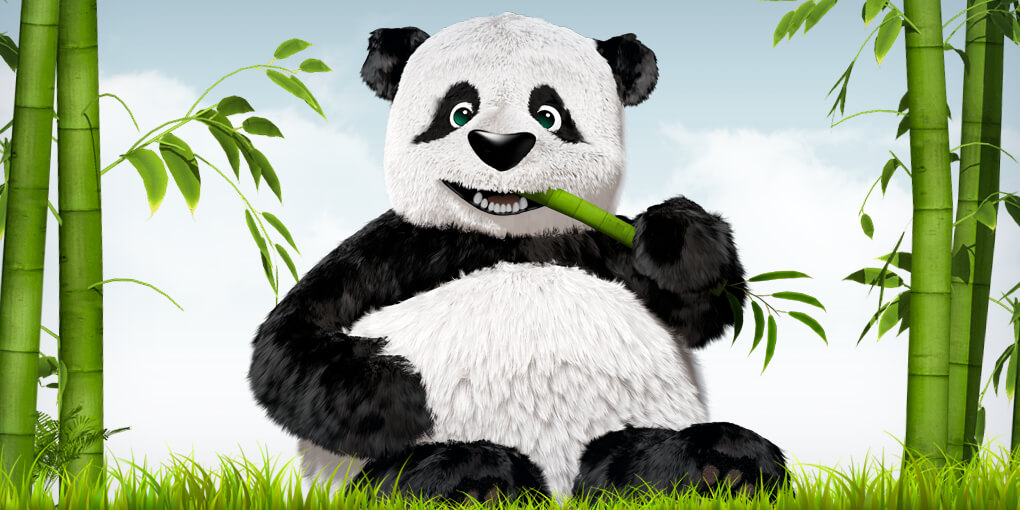

In [1]:
from PIL import Image
import numpy as np
from numpy import array
im=Image.open('10.jpg')
arr = array(im)
im

In [2]:
arr

array([[[158, 182, 194],
        [164, 187, 201],
        [166, 190, 202],
        ...,
        [ 48,  71,  27],
        [143, 165, 152],
        [163, 184, 189]],

       [[159, 183, 193],
        [162, 185, 199],
        [165, 188, 202],
        ...,
        [ 21,  42,   9],
        [110, 131, 126],
        [161, 180, 194]],

       [[161, 186, 193],
        [159, 182, 196],
        [162, 185, 203],
        ...,
        [ 17,  36,  14],
        [ 85, 105, 103],
        [166, 185, 199]],

       ...,

       [[107, 135,  16],
        [ 93, 115,   7],
        [ 93, 114,   0],
        ...,
        [114, 139,   9],
        [130, 153,   0],
        [138, 160,   0]],

       [[100, 127,  10],
        [ 89, 109,  10],
        [ 86, 104,   0],
        ...,
        [114, 137,   7],
        [126, 146,   0],
        [131, 152,   0]],

       [[ 88, 115,   0],
        [ 86, 103,   9],
        [ 79,  96,   0],
        ...,
        [114, 135,   4],
        [121, 140,   0],
        [123, 146,   0]]

In [3]:
import random
m=len(arr)
n=len(arr[0])

noise = (m*n)//50
for i in range(noise):
    x = random.randint(0,m-1)
    y = random.randint(0,n-1)
    arr[x][y] = [random.randint(0,255),random.randint(0,255),random.randint(0,255)]
    

In [4]:
arr

array([[[158, 182, 194],
        [164, 187, 201],
        [166, 190, 202],
        ...,
        [ 48,  71,  27],
        [143, 165, 152],
        [163, 184, 189]],

       [[159, 183, 193],
        [162, 185, 199],
        [165, 188, 202],
        ...,
        [ 21,  42,   9],
        [110, 131, 126],
        [161, 180, 194]],

       [[161, 186, 193],
        [159, 182, 196],
        [162, 185, 203],
        ...,
        [ 17,  36,  14],
        [ 59,   7, 108],
        [166, 185, 199]],

       ...,

       [[107, 135,  16],
        [ 93, 115,   7],
        [ 93, 114,   0],
        ...,
        [114, 139,   9],
        [130, 153,   0],
        [138, 160,   0]],

       [[100, 127,  10],
        [ 89, 109,  10],
        [ 86, 104,   0],
        ...,
        [114, 137,   7],
        [126, 146,   0],
        [131, 152,   0]],

       [[ 88, 115,   0],
        [ 86, 103,   9],
        [ 79,  96,   0],
        ...,
        [114, 135,   4],
        [121, 140,   0],
        [123, 146,   0]]

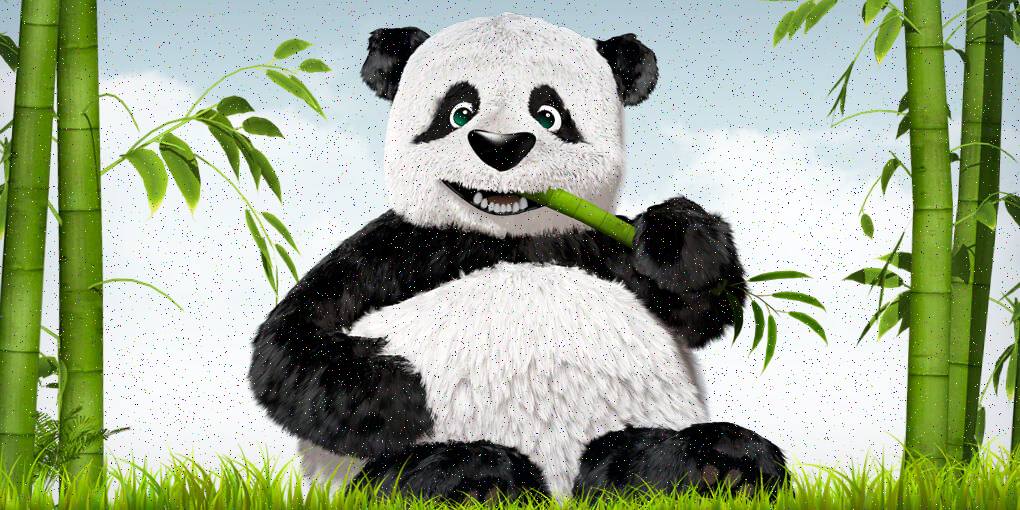

In [5]:
new_im = Image.fromarray(arr)
new_im

In [6]:
new_im.save('10.png')

In [7]:
import statistics
threshold_mean = 5
threshold_med = 10

arrMean = arr.copy()
arrMedian = arr.copy()

for i in range(1,m-1):
    for j in range(1,n-1):
        dataR = [arr[i-1][j-1][0],arr[i+1][j+1][0],arr[i-1][j][0],arr[i][j-1][0],arr[i+1][j][0],arr[i][j+1][0],arr[i-1][j+1][0],arr[i+1][j-1][0]]
        dataG = [arr[i-1][j-1][1],arr[i+1][j+1][1],arr[i-1][j][1],arr[i][j-1][1],arr[i+1][j][1],arr[i][j+1][1],arr[i-1][j+1][1],arr[i+1][j-1][1]]
        dataB = [arr[i-1][j-1][2],arr[i+1][j+1][2],arr[i-1][j][2],arr[i][j-1][2],arr[i+1][j][2],arr[i][j+1][2],arr[i-1][j+1][2],arr[i+1][j-1][2]]
        
        meanDR = int(statistics.mean(dataR))
        meanDG = int(statistics.mean(dataG))
        meanDB = int(statistics.mean(dataB))
        
        medianDR = int(statistics.median(dataR+[1]))
        medianDG = int(statistics.median(dataG+[1]))
        medianDB = int(statistics.median(dataB+[1]))
        
        
        difMeanR = abs(arr[i][j][0] - meanDR)
        difMeanG = abs(arr[i][j][1] - meanDG)
        difMeanB = abs(arr[i][j][2] - meanDB)
        
        difMedianR = abs(arr[i][j][0] - medianDR)
        difMedianG = abs(arr[i][j][1] - medianDG)
        difMedianB = abs(arr[i][j][2] - medianDB)
        
        if difMeanR>=threshold_mean and difMeanG >= threshold_mean and difMeanB >= threshold_mean:
            arrMean[i][j] = [meanDR,meanDG,meanDB]
        if difMedianR >= threshold_med or difMedianG >= threshold_med or difMedianB >= threshold_med:
            arrMedian[i][j] = [medianDR,medianDG,medianDB]
            

        

In [8]:
#top edge

for i in range(1,n-1):
    dataR = [arr[0][i-1][0],arr[0][i+1][0],arr[1][i-1][0],arr[1][i][0],arr[1][i+1][0]]
    dataG = [arr[0][i-1][1],arr[0][i+1][1],arr[1][i-1][1],arr[1][i][1],arr[1][i+1][1]]
    dataB = [arr[0][i-1][2],arr[0][i+1][2],arr[1][i-1][2],arr[1][i][2],arr[1][i+1][2]]
    
    meanDR = int(statistics.mean(dataR))
    meanDG = int(statistics.mean(dataG))
    meanDB = int(statistics.mean(dataB))

    medianDR = int(statistics.median(dataR))
    medianDG = int(statistics.median(dataG))
    medianDB = int(statistics.median(dataB))


    difMeanR = abs(arr[0][i][0] - meanDR)
    difMeanG = abs(arr[0][i][1] - meanDG)
    difMeanB = abs(arr[0][i][2] - meanDB)

    difMedianR = abs(arr[0][i][0] - medianDR)
    difMedianG = abs(arr[0][i][1] - medianDG)
    difMedianB = abs(arr[0][i][2] - medianDB)

    if difMeanR>=threshold_mean and difMeanG >= threshold_mean and difMeanB >= threshold_mean:
        arrMean[0][i] = [meanDR,meanDG,meanDB]
    if difMedianR >= threshold_med or difMedianG >= threshold_med or difMedianB >= threshold_med:
        arrMedian[0][i] = [medianDR,medianDG,medianDB]

In [9]:
# left edge

for i in range(1,m-1):
    dataR = [arr[i-1][0][0],arr[i+1][0][0],arr[i-1][1][0],arr[i][1][0],arr[i+1][1][0]]
    dataG = [arr[i-1][0][1],arr[i+1][0][1],arr[i-1][1][1],arr[i][1][1],arr[i+1][1][1]]
    dataB = [arr[i-1][0][2],arr[i+1][0][2],arr[i-1][1][2],arr[i][1][2],arr[i+1][1][2]]
    
    meanDR = int(statistics.mean(dataR))
    meanDG = int(statistics.mean(dataG))
    meanDB = int(statistics.mean(dataB))

    medianDR = int(statistics.median(dataR))
    medianDG = int(statistics.median(dataG))
    medianDB = int(statistics.median(dataB))


    difMeanR = abs(arr[i][0][0] - meanDR)
    difMeanG = abs(arr[i][0][1] - meanDG)
    difMeanB = abs(arr[i][0][2] - meanDB)

    difMedianR = abs(arr[i][0][0] - medianDR)
    difMedianG = abs(arr[i][0][1] - medianDG)
    difMedianB = abs(arr[i][0][2] - medianDB)

    if difMeanR>=threshold_mean and difMeanG >= threshold_mean and difMeanB >= threshold_mean:
        arrMean[i][0] = [meanDR,meanDG,meanDB]
    if difMedianR >= threshold_med or difMedianG >= threshold_med or difMedianB >= threshold_med:
        arrMedian[i][0] = [medianDR,medianDG,medianDB]


In [10]:
#right edge

for i in range(1,m-1):
    dataR = [arr[i-1][n-1][0],arr[i+1][n-1][0],arr[i-1][n-2][0],arr[i][n-2][0],arr[i+1][n-2][0]]
    dataG = [arr[i-1][n-1][1],arr[i+1][n-1][1],arr[i-1][n-2][1],arr[i][n-2][1],arr[i+1][n-2][1]]
    dataB = [arr[i-1][n-1][2],arr[i+1][n-1][2],arr[i-1][n-2][2],arr[i][n-2][2],arr[i+1][n-2][2]]
    
    meanDR = int(statistics.mean(dataR))
    meanDG = int(statistics.mean(dataG))
    meanDB = int(statistics.mean(dataB))

    medianDR = int(statistics.median(dataR))
    medianDG = int(statistics.median(dataG))
    medianDB = int(statistics.median(dataB))


    difMeanR = abs(arr[i][n-1][0] - meanDR)
    difMeanG = abs(arr[i][n-1][1] - meanDG)
    difMeanB = abs(arr[i][n-1][2] - meanDB)

    difMedianR = abs(arr[i][n-1][0] - medianDR)
    difMedianG = abs(arr[i][n-1][1] - medianDG)
    difMedianB = abs(arr[i][n-1][2] - medianDB)

    if difMeanR>=threshold_mean and difMeanG >= threshold_mean and difMeanB >= threshold_mean:
        arrMean[i][n-1] = [meanDR,meanDG,meanDB]
    if difMedianR >= threshold_med or difMedianG >= threshold_med or difMedianB >= threshold_med:
        arrMedian[i][n-1] = [medianDR,medianDG,medianDB]


In [11]:
#bottom edge

for i in range(1,n-1):
    dataR = [arr[m-1][i-1][0],arr[m-1][i+1][0],arr[m-2][i-1][0],arr[m-2][i][0],arr[m-2][i+1][0]]
    dataG = [arr[m-1][i-1][1],arr[m-1][i+1][1],arr[m-2][i-1][1],arr[m-2][i][1],arr[m-2][i+1][1]]
    dataB = [arr[m-1][i-1][2],arr[m-1][i+1][2],arr[m-2][i-1][2],arr[m-2][i][2],arr[m-2][i+1][2]]
    
    meanDR = int(statistics.mean(dataR))
    meanDG = int(statistics.mean(dataG))
    meanDB = int(statistics.mean(dataB))

    medianDR = int(statistics.median(dataR))
    medianDG = int(statistics.median(dataG))
    medianDB = int(statistics.median(dataB))


    difMeanR = abs(arr[m-1][i][0] - meanDR)
    difMeanG = abs(arr[m-1][i][1] - meanDG)
    difMeanB = abs(arr[m-1][i][2] - meanDB)

    difMedianR = abs(arr[m-1][i][0] - medianDR)
    difMedianG = abs(arr[m-1][i][1] - medianDG)
    difMedianB = abs(arr[m-1][i][2] - medianDB)

    if difMeanR>=threshold_mean and difMeanG >= threshold_mean and difMeanB >= threshold_mean:
        arrMean[m-1][i] = [meanDR,meanDG,meanDB]
    if difMedianR >= threshold_med or difMedianG >= threshold_med or difMedianB >= threshold_med:
        arrMedian[m-1][i] = [medianDR,medianDG,medianDB]

In [12]:
#top left

dataR = [arr[0][1][0],arr[1][0][0],arr[1][1][0]]
dataG = [arr[0][1][1],arr[1][0][1],arr[1][1][1]]
dataB = [arr[0][1][2],arr[1][0][1],arr[1][1][2]]

meanDR = int(statistics.mean(dataR))
meanDG = int(statistics.mean(dataG))
meanDB = int(statistics.mean(dataB))

medianDR = int(statistics.median(dataR))
medianDG = int(statistics.median(dataG))
medianDB = int(statistics.median(dataB))


difMeanR = abs(arr[0][0][0] - meanDR)
difMeanG = abs(arr[0][0][1] - meanDG)
difMeanB = abs(arr[0][0][2] - meanDB)

difMedianR = abs(arr[0][0][0] - medianDR)
difMedianG = abs(arr[0][0][1] - medianDG)
difMedianB = abs(arr[0][0][2] - medianDB)

if difMeanR>=threshold_mean and difMeanG >= threshold_mean and difMeanB >= threshold_mean:
    arrMean[0][0] = [meanDR,meanDG,meanDB]
if difMedianR >= threshold_med or difMedianG >= threshold_med or difMedianB >= threshold_med:
    arrMedian[0][0] = [medianDR,medianDG,medianDB]

In [13]:
#bottom left

dataR = [arr[m-1][1][0],arr[m-2][0][0],arr[m-2][1][0]]
dataG = [arr[m-1][1][1],arr[m-2][0][1],arr[m-2][1][1]]
dataB = [arr[m-1][1][2],arr[m-2][0][1],arr[m-2][1][2]]

meanDR = int(statistics.mean(dataR))
meanDG = int(statistics.mean(dataG))
meanDB = int(statistics.mean(dataB))

medianDR = int(statistics.median(dataR))
medianDG = int(statistics.median(dataG))
medianDB = int(statistics.median(dataB))


difMeanR = abs(arr[m-1][0][0] - meanDR)
difMeanG = abs(arr[m-1][0][1] - meanDG)
difMeanB = abs(arr[m-1][0][2] - meanDB)

difMedianR = abs(arr[m-1][0][0] - medianDR)
difMedianG = abs(arr[m-1][0][1] - medianDG)
difMedianB = abs(arr[m-1][0][2] - medianDB)

if difMeanR>=threshold_mean and difMeanG >= threshold_mean and difMeanB >= threshold_mean:
    arrMean[m-1][i] = [meanDR,meanDG,meanDB]
if difMedianR >= threshold_med or difMedianG >= threshold_med or difMedianB >= threshold_med:
    arrMedian[m-1][i] = [medianDR,medianDG,medianDB]


In [14]:
#bottom right

dataR = [arr[m-1][n-2][0],arr[m-2][n-1][0],arr[m-2][n-2][0]]
dataG = [arr[m-1][n-2][1],arr[m-2][n-1][1],arr[m-2][n-2][1]]
dataB = [arr[m-1][n-2][2],arr[m-2][n-1][1],arr[m-2][n-2][2]]

meanDR = int(statistics.mean(dataR))
meanDG = int(statistics.mean(dataG))
meanDB = int(statistics.mean(dataB))

medianDR = int(statistics.median(dataR))
medianDG = int(statistics.median(dataG))
medianDB = int(statistics.median(dataB))


difMeanR = abs(arr[m-1][n-1][0] - meanDR)
difMeanG = abs(arr[m-1][n-1][1] - meanDG)
difMeanB = abs(arr[m-1][n-1][2] - meanDB)

difMedianR = abs(arr[m-1][n-1][0] - medianDR)
difMedianG = abs(arr[m-1][n-1][1] - medianDG)
difMedianB = abs(arr[m-1][n-1][2] - medianDB)

if difMeanR>=threshold_mean and difMeanG >= threshold_mean and difMeanB >= threshold_mean:
    arrMean[m-1][n-1] = [meanDR,meanDG,meanDB]
if difMedianR >= threshold_med or difMedianG >= threshold_med or difMedianB >= threshold_med:
    arrMedian[m-1][n-1] = [medianDR,medianDG,medianDB]

In [15]:
#top right

dataR = [arr[0][n-2][0],arr[1][n-1][0],arr[1][n-2][0]]
dataG = [arr[0][n-2][1],arr[1][n-1][1],arr[1][n-2][1]]
dataB = [arr[0][n-2][2],arr[1][n-1][1],arr[1][n-2][2]]

meanDR = int(statistics.mean(dataR))
meanDG = int(statistics.mean(dataG))
meanDB = int(statistics.mean(dataB))

medianDR = int(statistics.median(dataR))
medianDG = int(statistics.median(dataG))
medianDB = int(statistics.median(dataB))


difMeanR = abs(arr[0][n-1][0] - meanDR)
difMeanG = abs(arr[0][n-1][1] - meanDG)
difMeanB = abs(arr[0][n-1][2] - meanDB)

difMedianR = abs(arr[0][n-1][0] - medianDR)
difMedianG = abs(arr[0][n-1][1] - medianDG)
difMedianB = abs(arr[0][n-1][2] - medianDB)

if difMeanR>=threshold_mean and difMeanG >= threshold_mean and difMeanB >= threshold_mean:
    arrMean[0][0] = [meanDR,meanDG,meanDB]
if difMedianR >= threshold_med or difMedianG >= threshold_med or difMedianB >= threshold_med:
    arrMedian[0][0] = [medianDR,medianDG,medianDB]

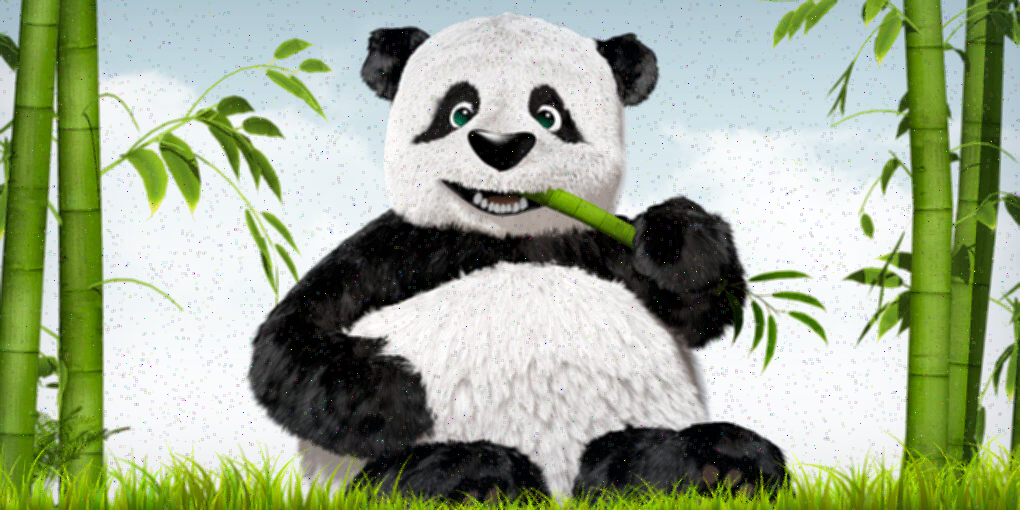

In [16]:
denoised_mean_im = Image.fromarray(arrMean)
denoised_mean_im

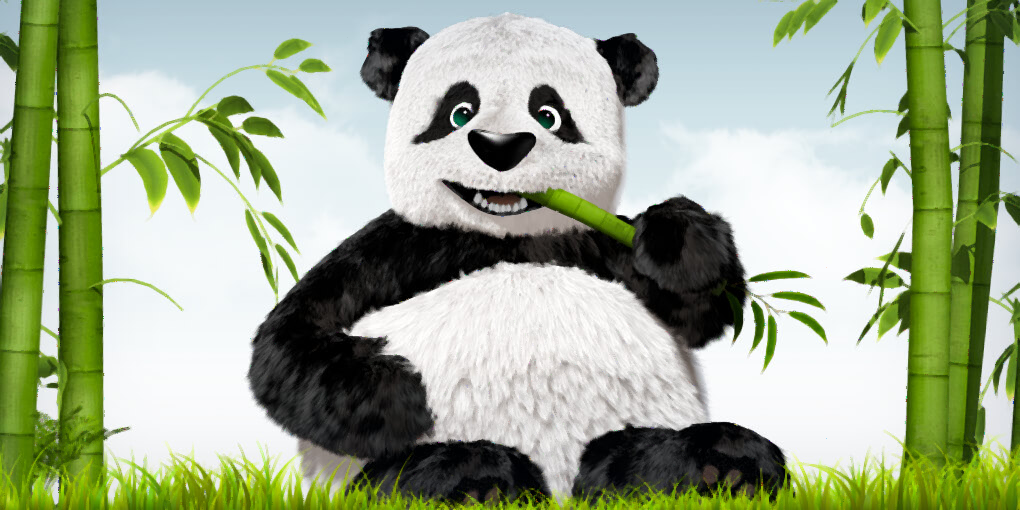

In [17]:
denoised_median_im = Image.fromarray(arrMedian)
denoised_median_im